# Jupyter Notebook for Linear Regression

Short example to perform linear regression in python using sklearn and statsmodels ona synthetic dataset

In [ ]:
# import data and libraries
import os
import numpy as np
import pandas as pd
import copy
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
# Galton regression
# X altezza padre- Y altezza figlio
X = pd.DataFrame({'Dad height':[1.5240, 1.5748, 1.6256, 1.6510, 1.6764, 1.7018, 1.7272, 1.7780, 1.8288, 1.8796]})
Y = pd.DataFrame({'Son height':[1.6154, 1.6561, 1.6764, 1.6637, 1.6993, 1.7043, 1.7120, 1.7348, 1.7805, 1.7780]});

In [45]:
Y.head(3)

,Son height
0,1.6154
1,1.6561
2,1.6764


In [ ]:
X.loc[2]

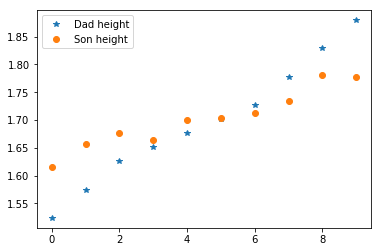

In [46]:
# Plot the data
plt.plot(X, '*')
plt.plot(Y, 'o')
plt.legend(['Dad height','Son height'])
# axes.plot(t, np.array(predictions)[50:100,0], 'o', label='prediction')

In [ ]:
Data = copy.deepcopy(X)

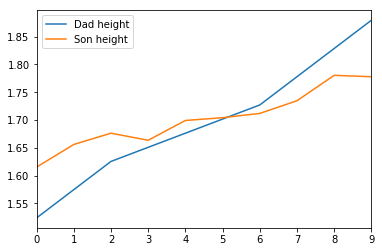

In [47]:
# Second way yo plot the data
Data["Son height"] = Y
Data.plot()

In [48]:
# Create the linear regression object
regr = linear_model.LinearRegression()
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
# fit the model to estimate the parameters
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
# let's see the coefficients
# regr.coef_
# regr.intercept_
A = pd.DataFrame([float(regr.intercept_), float(regr.coef_)], index = ['Intercept', 'β'], columns = ['Value'])
# # Create our dataframe
A

,Value
Intercept,0.913841
β,0.464549


In [55]:
# let us plot our regression line
# we create some fake X's = np.transpose(np.linspace(1.40,2, 10))
fit_value = pd.DataFrame(regr.intercept_+np.transpose(np.linspace(1.40,2, 10))*regr.coef_)
#fit_value.transpose()
Y_hat = pd.DataFrame(fit_value.transpose())
Y_hat.rename(columns = {0:'Fit val'})   # index the column first


,Fit val
0,1.564209
1,1.595179
2,1.626149
3,1.657119
4,1.688089
5,1.719059
6,1.750029
7,1.780998
8,1.811968
9,1.842938


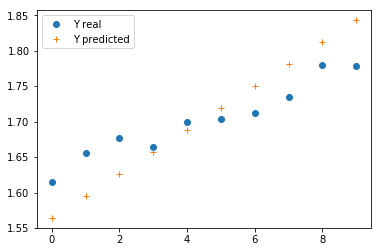

In [56]:
# plt.plot(X, '*')
plt.plot(Y, 'o', label = 'Y real')
plt.plot(Y_hat, '+', label = 'Y predicted')
plt.legend()
plt.show()

In [57]:
# let us eval the performance using the MSFE
print("Mean squared error: %.8f"
      % mean_squared_error(Y, Y_hat))

Mean squared error: 0.00180316


In [58]:
# Explained variance score: 1 is perfect prediction
print("Variance score: %.8f" 
      % r2_score(Y, Y_hat))

Variance score: 0.27453730


### Decompose bias and variance trade-off

In [ ]:
# errors
predict_error = mean_squared_error(Y, Y_hat)
print('predict squared error', predict_error)
# mean errors
# mean_pred_error = mean()

# bias squared 
bias_2 = np.mean((np.mean(Y_hat.values) - np.linspace(1.40,2, 10).reshape(-1,1))**2)
print('bias squared', bias_2)

# variance
variance_ = np.var(Y_hat)
print('variance', variance_[0])

#ariance of the errors
variance_errors = np.var(Y_hat - np.linspace(1.40,2, 10).reshape(-1,1))
print('variance of the errors', variance_errors[0])

it is very small, because the relation is linear and the generated data are very similar to the original one.

In [ ]:
import statsmodels.api as sm
ols = sm.OLS(Y, X)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
print(ols_result.HC0_se)
# and covariance estimates
print(ols_result.cov_HC0)

In [ ]:
ols_result.summary()